# Project Name: Car Price Prediction

# Problem Statement
This project aims to build a machine learning model to predict the selling price of a car based on various features such as brand, year of manufacture, fuel type, transmission, ownership history, and current market price. The goal is to assist sellers and buyers in making data-driven pricing decisions and to understand how different factors influence the value of a car.

In [197]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df=pd.read_csv("../Downloads/car data.csv")

In [199]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [201]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [202]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [203]:
df.shape

(301, 9)

In [204]:
df.size

2709

In [205]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

In [206]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [207]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# Visualization

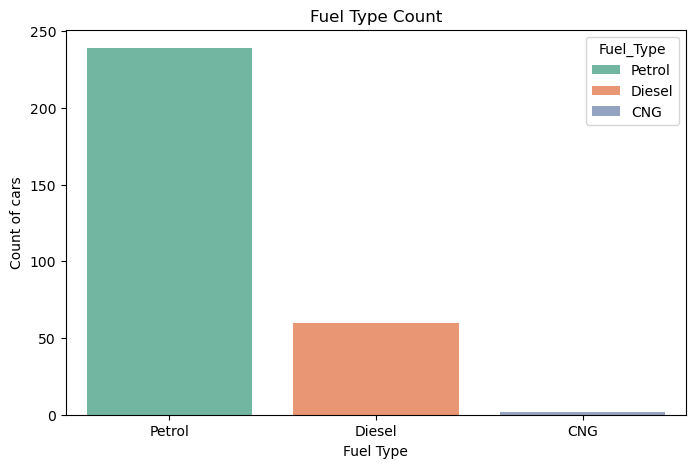

In [208]:
plt.figure(figsize=(8,5))
sns.countplot(x="Fuel_Type",hue="Fuel_Type",data=df,palette="Set2",legend=True)
plt.xlabel("Fuel Type")
plt.ylabel("Count of cars")
plt.title("Fuel Type Count")
plt.show()

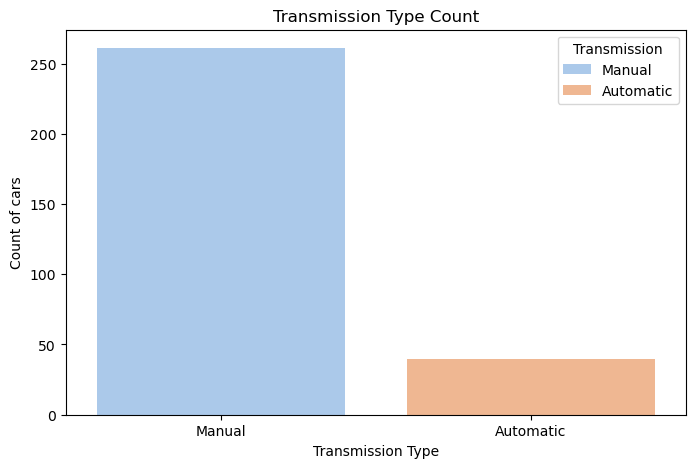

In [209]:
plt.figure(figsize=(8,5))
sns.countplot(x="Transmission",hue="Transmission",data=df,palette="pastel",legend=True)
plt.xlabel("Transmission Type")
plt.ylabel("Count of cars")
plt.title("Transmission Type Count")
plt.show()

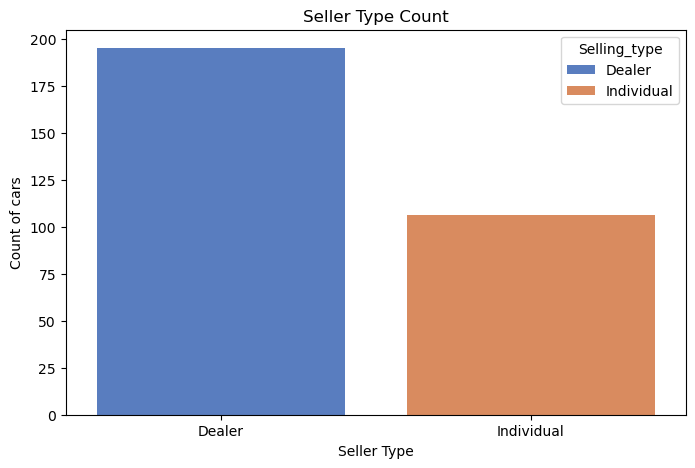

In [210]:
plt.figure(figsize=(8,5))
sns.countplot(x="Selling_type",hue="Selling_type",data=df,palette="muted",legend=True)
plt.xlabel("Seller Type")
plt.ylabel("Count of cars")
plt.title("Seller Type Count")
plt.show()

# Checking Outliers

<Axes: ylabel='Selling_Price'>

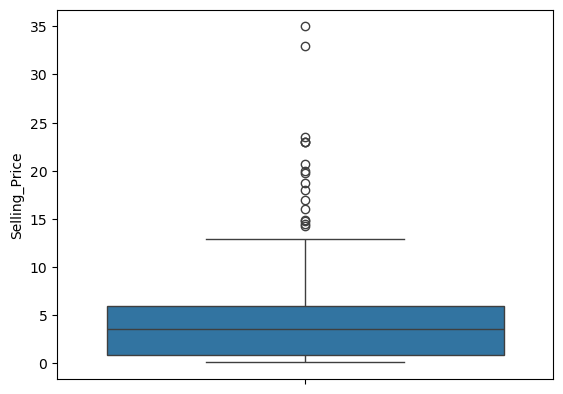

In [211]:
sns.boxplot(df["Selling_Price"])

<Axes: ylabel='Present_Price'>

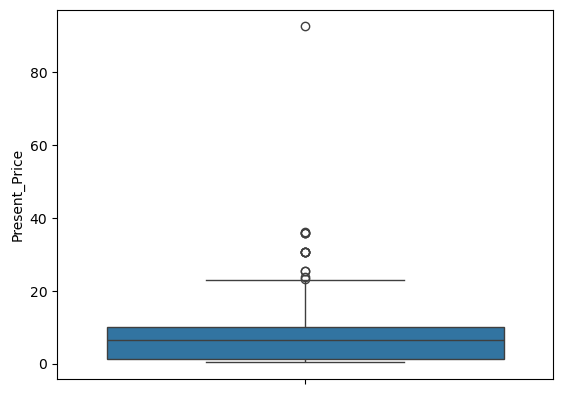

In [212]:
sns.boxplot(df["Present_Price"])

In [2]:
# we checked for outliers but as luxury cars may have higher prices

In [213]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Correlation Map

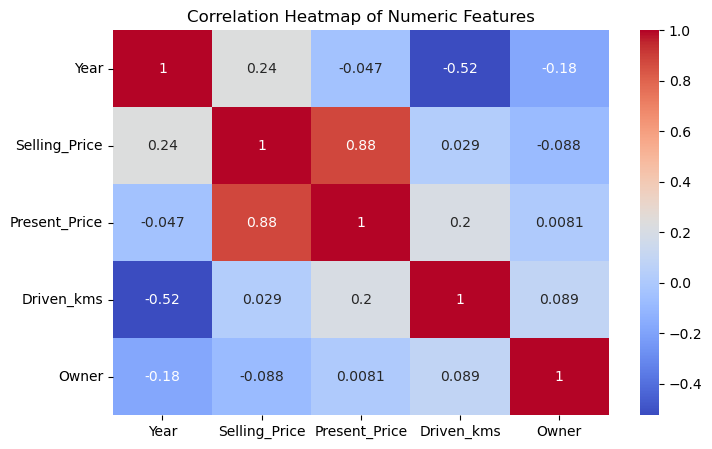

In [214]:
num_col = df.drop(columns=["Car_Name", "Fuel_Type", "Selling_type", "Transmission"])
plt.figure(figsize=(8,5))
sns.heatmap(num_col.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [215]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [216]:
# Convert categorical columns into numeric values using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Selling_type'], drop_first=True)

In [217]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Selling_type_Individual
0,ritz,2014,3.35,5.59,27000,0,False,True,True,False
1,sx4,2013,4.75,9.54,43000,0,True,False,True,False
2,ciaz,2017,7.25,9.85,6900,0,False,True,True,False
3,wagon r,2011,2.85,4.15,5200,0,False,True,True,False
4,swift,2014,4.60,6.87,42450,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,True,False,True,False
297,brio,2015,4.00,5.90,60000,0,False,True,True,False
298,city,2009,3.35,11.00,87934,0,False,True,True,False
299,city,2017,11.50,12.50,9000,0,True,False,True,False


In [218]:
x=df.drop(columns=["Car_Name","Selling_Price"])
y=df["Selling_Price"]

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [220]:
x_train 

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Selling_type_Individual
69,2016,20.91,12000,0,False,True,True,False
177,2016,0.57,24000,0,False,True,False,True
49,2017,9.29,37000,0,False,True,False,False
16,2015,10.79,41678,0,True,False,True,False
54,2005,10.21,90000,0,False,True,True,True
...,...,...,...,...,...,...,...,...
268,2017,5.80,19000,0,False,True,True,False
193,2013,0.65,24000,1,False,True,True,True
165,2016,0.54,500,0,False,True,False,True
7,2015,8.61,33429,0,True,False,True,False


In [221]:
y_train

69     14.25
177     0.35
49      7.75
16      7.25
54      2.75
       ...  
268     4.80
193     0.20
165     0.45
7       6.50
219     4.50
Name: Selling_Price, Length: 240, dtype: float64

In [222]:
x_test

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Selling_type_Individual
18,2015,5.09,35500,0,False,False,True,False
111,2016,1.50,8700,0,False,True,True,True
237,2015,13.60,68000,0,True,False,True,False
245,2012,9.40,71000,0,True,False,True,False
295,2015,13.09,60076,0,True,False,True,False
...,...,...,...,...,...,...,...,...
200,2006,0.75,92233,0,False,True,True,True
160,2011,0.95,24000,0,False,True,True,True
174,2015,0.72,38600,0,False,True,True,True
129,2017,0.84,5000,0,False,True,True,True


In [223]:
y_test

18      3.25
111     1.15
237    11.25
245     5.20
295     8.55
       ...  
200     0.10
160     0.45
174     0.38
129     0.78
135     0.65
Name: Selling_Price, Length: 61, dtype: float64

# 1.Linear Regressor Model

In [224]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [225]:
lr.fit(x_train,y_train)

LinearRegression()

In [226]:
ypred_lr=lr.predict(x_test)
ypred_lr

array([ 3.7307986 ,  1.9998274 ,  9.44782855,  6.2456417 ,  9.28038109,
        7.5486533 ,  5.10313976, -1.22386093, -2.23684007,  4.69125393,
        8.2000835 ,  5.32773195,  1.12367606,  1.41529176,  7.67157287,
        1.9922988 ,  1.60711263,  6.74869266, -0.62006552,  6.47580603,
        6.27510038,  1.65524365,  2.68531932,  3.74979795,  2.54959561,
        2.25399354,  4.37875793, -0.09563382,  3.0257768 ,  4.20719261,
        5.62202112,  3.37010831,  0.56764312,  8.17167098,  1.87783291,
        4.94667732,  0.85848491,  2.7927096 ,  0.34521992, -4.38789235,
        0.82320559, -0.502101  , 16.10115944,  6.08025141,  3.68357071,
       20.48513962,  8.12258928,  1.81695671,  2.82138299,  1.6411154 ,
        2.60867288,  8.2114422 ,  1.48543689,  1.70917358,  2.71756848,
        7.59917143, -3.44658667, -0.62342606,  1.00828399,  2.19660579,
        1.23962917])

In [227]:
lr.score(x_test,ypred_lr)

1.0

In [228]:
lr.score(x_test,y_test)

0.8776817311940001

In [229]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_lr=mean_absolute_error(y_test,ypred_lr)
print("Mean Absolute error is:",mae_lr)


mse_lr=mean_squared_error(y_test,ypred_lr)
print("Mean Squared error is:",mse_lr)

rmse_lr=np.sqrt(mse_lr)
print("Root Mean Squared error is:",rmse_lr)

r2_lr=r2_score(y_test,ypred_lr)
print("r2 score is:",r2_lr)

Mean Absolute error is: 1.090707975126711
Mean Squared error is: 2.038889778328749
Root Mean Squared error is: 1.4278969774912857
r2 score is: 0.8776817311940001


# 2.Random Forest Regressor

In [230]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [231]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [232]:
ypred_rf=rf.predict(x_test)
ypred_rf

array([ 3.039 ,  1.1576,  9.995 ,  5.0365, 11.1124,  8.997 ,  5.5955,
        0.4564,  0.459 ,  5.4282,  9.8483,  6.1345,  0.5115,  1.1301,
        8.7618,  0.4603,  0.519 ,  5.6775,  0.4465,  7.9015,  4.261 ,
        2.442 ,  1.9176,  0.4516,  1.5965,  0.8335,  5.101 ,  0.5629,
        3.386 ,  4.4345,  5.7525,  3.3008,  0.5671,  7.4105,  2.414 ,
        5.6016,  1.0762,  3.5581,  1.0541,  1.106 ,  0.5699,  2.3859,
       14.962 ,  6.8364,  3.986 , 22.455 ,  9.4692,  0.7126,  2.934 ,
        0.4503,  1.4055,  7.2295,  1.2471,  0.654 ,  2.5775,  6.9145,
        0.2118,  0.4593,  0.3089,  0.7591,  0.4253])

In [233]:
rf.score(x_test,ypred_rf)

1.0

In [234]:
rf.score(x_test,y_test)

0.9678927643475

In [235]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_rf=mean_absolute_error(y_test,ypred_rf)
print("Mean Absolute error is:",mae_rf)


mse_rf=mean_squared_error(y_test,ypred_rf)
print("Mean Squared error is:",mse_rf)

rmse_rf=np.sqrt(mse_rf)
print("Root Mean Squared error is:",rmse_rf)

r2_rf=r2_score(y_test,ypred_rf)
print("r2 score is:",r2_rf)

Mean Absolute error is: 0.4622704918032788
Mean Squared error is: 0.5351867322950821
Root Mean Squared error is: 0.7315645783490902
r2 score is: 0.9678927643475


# 3.XG Boost Regressor

In [236]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror', 
                        n_estimators=100, 
                        learning_rate=0.1, 
                        max_depth=3, 
                        random_state=40)

In [237]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=40, ...)

In [238]:
ypred_xgbr=xgbr.predict(x_test)
ypred_xgbr

array([ 3.1194093 ,  1.2522557 , 10.154716  ,  4.867694  , 10.09667   ,
        8.91184   ,  5.110477  ,  0.24777274,  0.12620294,  5.1704335 ,
        9.95723   ,  6.9024982 ,  0.64226955,  1.1432312 ,  9.201507  ,
        0.59219617,  0.69808203,  5.7285056 ,  0.47268572,  7.683419  ,
        4.602937  ,  2.6408675 ,  1.4664453 ,  0.61117035,  1.3504083 ,
        0.8278082 ,  4.6482396 ,  0.44984686,  3.500802  ,  4.304386  ,
        5.6367517 ,  3.3882518 ,  0.47723708,  7.2772975 ,  2.3550782 ,
        5.219943  ,  1.0372758 ,  3.257714  ,  0.8602997 ,  0.42019185,
        0.6663985 ,  2.1322753 , 13.707682  ,  6.779597  ,  3.1477404 ,
       19.5887    ,  9.954922  ,  0.74524266,  2.7192333 ,  0.5111784 ,
        1.4041553 ,  7.2722116 ,  1.4172473 ,  0.70554036,  2.5616183 ,
        6.7890663 , -0.33787385,  0.4458967 ,  0.4782277 ,  0.7881058 ,
        0.5893855 ], dtype=float32)

In [239]:
xgbr.score(x_test,ypred_xgbr)

1.0

In [240]:
xgbr.score(x_test,y_test)

0.9755579160740535

In [241]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_xgbr=mean_absolute_error(y_test,ypred_xgbr)
print("Mean Absolute error is:",mae_xgbr)


mse_xgbr=mean_squared_error(y_test,ypred_xgbr)
print("Mean Squared error is:",mse_xgbr)

rmse_xgbr=np.sqrt(mse_xgbr)
print("Root Mean Squared error is:",rmse_rf)

r2_xgbr=r2_score(y_test,ypred_xgbr)
print("r2 score is:",r2_xgbr)

Mean Absolute error is: 0.40349588330651887
Mean Squared error is: 0.4074184139795571
Root Mean Squared error is: 0.7315645783490902
r2 score is: 0.9755579160740535


# 4.Light GBM Regressor

In [242]:
import lightgbm as lgb

In [243]:
lgbm=lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=40)

In [244]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 7
[LightGBM] [Info] Start training from score 4.868708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(max_depth=3, random_state=40)

In [245]:
ypred_lg=lgbm.predict(x_test)
ypred_lg

array([ 2.81210624e+00,  1.18467286e+00,  1.37230947e+01,  4.75016329e+00,
        1.20219187e+01,  8.20218852e+00,  5.04564693e+00, -3.69797832e-03,
       -4.66376957e-02,  4.18047746e+00,  9.77311147e+00,  6.46847335e+00,
        5.70303194e-01,  9.97252507e-01,  8.60101090e+00,  8.20953678e-01,
        5.77705589e-01,  4.85616478e+00,  7.41181874e-01,  7.43208056e+00,
        4.35401684e+00,  2.51647284e+00,  2.07629607e+00,  1.55912059e+00,
        1.55053225e+00,  1.08456301e+00,  4.72411233e+00,  5.92544673e-01,
        1.40680061e+00,  4.42699235e+00,  5.68686128e+00,  2.71205414e+00,
        5.83145566e-01,  7.32083002e+00,  2.39483567e+00,  4.96808027e+00,
        8.03130664e-01,  1.09340300e+00,  7.90052815e-01,  7.74365816e-01,
        7.11301217e-01,  1.90111674e+00,  1.58774830e+01,  7.05940917e+00,
        3.15044255e+00,  1.83865086e+01,  9.21329290e+00,  6.61895859e-01,
        2.81128902e+00,  4.58986679e-01,  1.55053225e+00,  7.32083002e+00,
        1.79024608e+00,  

In [246]:
lgbm.score(x_test,ypred_lgbm)

1.0

In [247]:
lgbm.score(x_test,y_test)

0.9572248098140529

In [248]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae_lg=mean_absolute_error(y_test,ypred_lg)
print("Mean Absolute error is:",mae_lg)


mse_lg=mean_squared_error(y_test,ypred_lg)
print("Mean Squared error is:",mse_lg)

rmse_lg=np.sqrt(mse_lg)
print("Root Mean Squared error is:",rmse_lg)

r2_lg=r2_score(y_test,ypred_lg)
print("r2 score is:",r2_lg)

Mean Absolute error is: 0.531477050733551
Mean Squared error is: 0.7130079495689995
Root Mean Squared error is: 0.8443979805571538
r2 score is: 0.9572248098140529


In [249]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor","XGBoost Regressor","LightGBM Regressor"],
    "R² Score": [r2_lr, r2_rf,r2_xgbr,r2_lg],
    "MAE": [mae_lr, mae_rf,mae_xgbr,mae_lg],
    "MSE": [mse_lr, mse_rf,mse_xgbr,mse_lg],
    "RMSE": [rmse_lr, rmse_rf,rmse_xgbr,rmse_lg]
})

In [250]:
final_results

,Model,R² Score,MAE,MSE,RMSE
0,Linear Regression,0.877682,1.090708,2.038890,1.427897
1,Random Forest Regressor,0.967893,0.462270,0.535187,0.731565
2,XGBoost Regressor,0.975558,0.403496,0.407418,0.638293
3,LightGBM Regressor,0.957225,0.531477,0.713008,0.844398


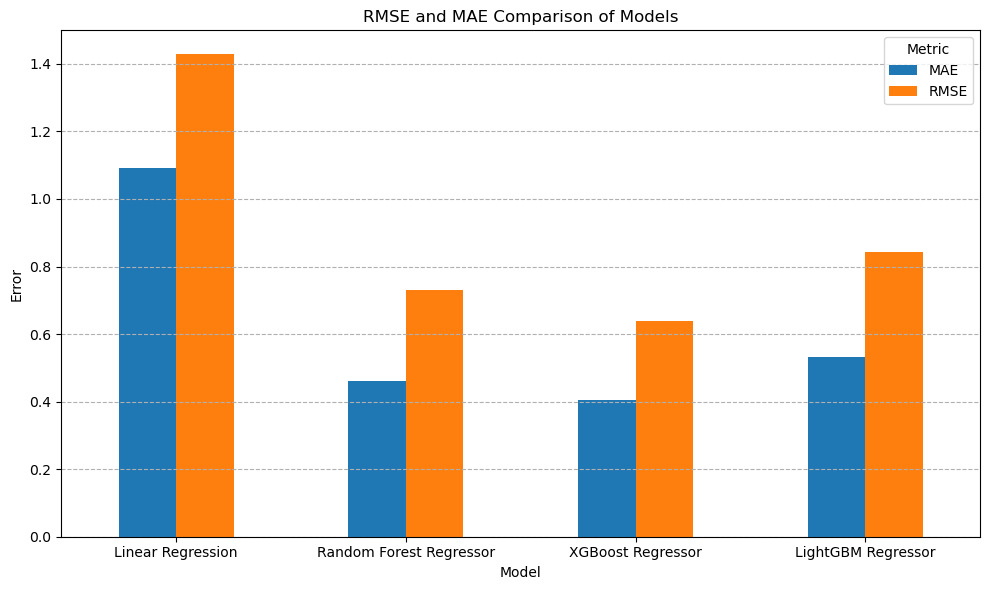

In [251]:
import matplotlib.pyplot as plt

metrics_df = final_results.set_index("Model")[["MAE", "RMSE"]]

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("RMSE and MAE Comparison of Models")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Comparison of R² Scores of Models')

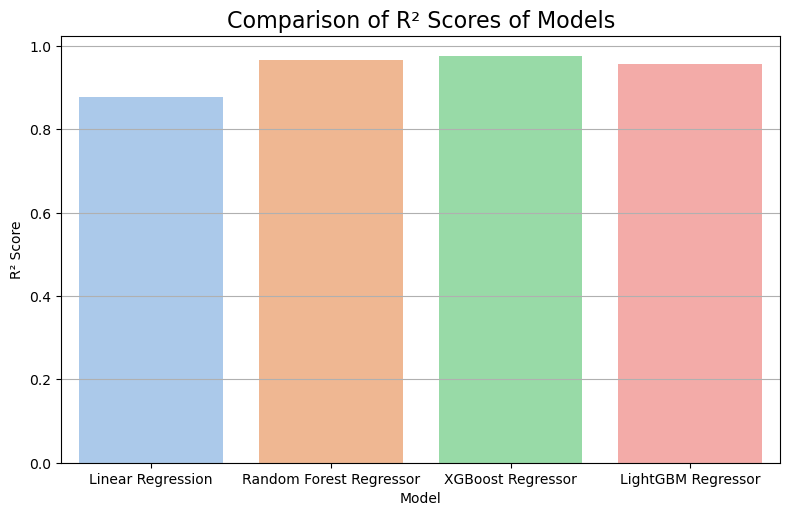

In [252]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="R² Score",hue="Model",data=final_results,palette="pastel")
plt.tight_layout()
plt.grid(True,axis="y")
plt.title("Comparison of R² Scores of Models",fontsize=16)

# Checking for Underfitting or Overfitting 

In [253]:
from sklearn.metrics import r2_score

# On training data
y_train_pred_lr = lr.predict(x_train)
r2_train = r2_score(y_train, y_train_pred_lr)

# On testing data
r2_test = r2_score(y_test, ypred_lr)

print("R² on Train:", r2_train)
print("R² on Test :", r2_test)


R² on Train: 0.8799535186696243
R² on Test : 0.8776817311940001


# Conclusion

As part of this internship project, a car price prediction model was developed and evaluated using regression techniques including Linear Regression, Random Forest, XGBoost, and LightGBM. The objective was to accurately estimate the resale price of used cars based on key features such as present price, driven kilometers, fuel type, transmission, and ownership history.

After thorough preprocessing and model evaluation, the XGBoost Regressor outperformed other models, achieving an R² Score of 0.9756 and the lowest MAE and RMSE values. The consistency between training and testing scores indicated that the models were well-fitted and free from overfitting or underfitting.

This project demonstrated the effectiveness of ensemble-based regression models in solving real-world pricing problems, offering a solid foundation for integration into applications like car resale platforms or dealership systems.